# Rules

- Internet and Books are ALLOWED
- Name your file as following: StudentID_ChineseName/EnglishName_quiz# 
- Extension of your file or your file type should be .py 
- If you submit the code within an hour you will get the full score. Otherwise, you will have 24 hours to finish it and you will get 80% of your final score.

# Probability

In the last quiz we described some important properties of probability and also came up with the way to compute conditional probability. We now extend that knowledge to derive Bayes's Theorem:

$$P(A|B) = \frac{P(A) P(B|A)}{P(B)}$$

As an example, we used data from the General Social Survey and Bayes's Theorem  to compute conditional probabilities.
But since we had the complete dataset, we didn't really need Bayes's Theorem.
It was easy enough to compute the left side of the equation directly, and no easier to compute the right side.

But often we don't have a complete dataset, and in that case Bayes's Theorem is more useful.   In this exercise, you'll use it to solve several more challenging problems related to conditional probability.

## Diachronic Bayes

There is another way to think of Bayes's theorem: it gives us a way to
update the probability of a hypothesis, $H$, given some body of data, $D$.

This interpretation is "diachronic", which means "related to change over time"; in this case, the probability of the hypotheses changes as we see new data.

Rewriting Bayes's theorem with $H$ and $D$ yields:

$$P(H|D) = \frac{P(H)~P(D|H)}{P(D)}$$

In this interpretation, each term has a name:

-  $P(H)$ is the probability of the hypothesis before we see the data, called the prior probability, or just **prior**.

-  $P(H|D)$ is the probability of the hypothesis after we see the data, called the **posterior**.

-  $P(D|H)$ is the probability of the data under the hypothesis, called the **likelihood**.

-  $P(D)$ is the **total probability of the data**, under any hypothesis.

Sometimes we can compute the prior based on background information. In other cases the prior is subjective; that is, reasonable people might disagree, either because they use different background information or because they interpret the same information differently.

The likelihood is usually the easiest part to compute.

Computing the total probability of the data can be tricky. 
It is supposed to be the probability of seeing the data under any hypothesis at all, but it can be hard to nail down what that means.

Most often we simplify things by specifying a set of hypotheses that
are:

* Mutually exclusive, which means that only one of them can be true, and

* Collectively exhaustive, which means one of them must be true.

When these conditions apply, we can compute $P(D)$ using the law of total probability.  For example, with two hypotheses, $H_1$ and $H_2$:

$$P(D) = P(H_1)~P(D|H_1) + P(H_2)~P(D|H_2)$$

And more generally, with any number of hypotheses:

$$P(D) = \sum_i P(H_i)~P(D|H_i)$$

The process in this section, using data and a prior probability to compute a posterior probability, is called a **Bayesian update**.

### We want you to complete the function that will compute the unnormalized and normalized posterior probabilities

In [43]:
def update(table):
    """Compute the posterior probabilities."""
    table['unnorm'] = table['prior'] * table['likelihood'] # call the result `unnorm` because these values are the "unnormalized posteriors"
    prob_data = table['unnorm']/(table['unnorm'].sum())
    table['posterior'] = prob_data # Caclulate the normalized posterior probability
    return prob_data

## The Monty Hall Problem

Next we'll use a Bayes table to solve one of the most contentious problems in probability.

The Monty Hall problem is based on a game show called *Let's Make a Deal*. If you are a contestant on the show, here's how the game works:

* The host, Monty Hall, shows you three closed doors -- numbered 1, 2, and 3 -- and tells you that there is a prize behind each door.

* One prize is valuable (traditionally a car), the other two are less valuable (traditionally goats).

* The object of the game is to guess which door has the car. If you guess right, you get to keep the car.

Suppose you pick Door 1. Before opening the door you chose, Monty opens Door 3 and reveals a goat. Then Monty offers you the option to stick with your original choice or switch to the remaining unopened door.

To maximize your chance of winning the car, should you stick with Door 1 or switch to Door 2?

To answer this question, we have to make some assumptions about the behavior of the host:

1.  Monty always opens a door and offers you the option to switch.

2.  He never opens the door you picked or the door with the car.

3.  If you choose the door with the car, he chooses one of the other
    doors at random.

Under these assumptions, you are better off switching. 
If you stick, you win $1/3$ of the time. If you switch, you win $2/3$ of the time.

If you have not encountered this problem before, you might find that
answer surprising. You would not be alone; many people have the strong
intuition that it doesn't matter if you stick or switch. There are two
doors left, they reason, so the chance that the car is behind Door A is 50%. But that is wrong.

To see why, it can help to use a Bayes table. We start with three
hypotheses: the car might be behind Door 1, 2, or 3. According to the
statement of the problem, the prior probability for each door is 1/3.

In [44]:
import pandas as pd
from fractions import Fraction

In [45]:
table3 = pd.DataFrame(index=['Door 1', 'Door 2', 'Door 3'])
table3['prior'] = Fraction(1, 3)
table3

,prior
Door 1,1/3
Door 2,1/3
Door 3,1/3


The data is that Monty opened Door 3 and revealed a goat. So let's
consider the probability of the data under each hypothesis:

* If the car is behind Door 1, Monty chooses Door 2 or 3 at random, so the probability he opens Door 3 is $1/2$.

* If the car is behind Door 2, Monty has to open Door 3, so the probability of the data under this hypothesis is 1.

* If the car is behind Door 3, Monty does not open it, so the probability of the data under this hypothesis is 0.

Here are the likelihoods. 

In [46]:
table3['likelihood'] = Fraction(1, 2), 1, 0
table3

,prior,likelihood
Door 1,1/3,1/2
Door 2,1/3,1
Door 3,1/3,0


Now that we have priors and likelihoods, we can use `update` to compute the posterior probabilities. If your update function is correct then your Monty Hall table should look like the one below.

In [47]:
update(table3)
table3

,prior,likelihood,unnorm,posterior
Door 1,1/3,1/2,1/6,1/3
Door 2,1/3,1,1/3,2/3
Door 3,1/3,0,0,0


After Monty opens Door 3, the posterior probability of Door 1 is $1/3$;
the posterior probability of Door 2 is $2/3$.
So you are better off switching from Door 1 to Door 2.

As this example shows, our intuition for probability is not always
reliable. 
Bayes's Theorem can help by providing a divide-and-conquer strategy:

1.  First, write down the hypotheses and the data.

2.  Next, figure out the prior probabilities.

3.  Finally, compute the likelihood of the data under each hypothesis.

The Bayes table does the rest.

### You might hope to never see Monty Hall problem again...

If the Monty Hall problem makes your head hurt, you are not alone.  But we think it demonstrates the power of Bayes's Theorem as a divide-and-conquer strategy for solving tricky problems.  And we hope it provides some insight into *why* the answer is what it is.

When Monty opens a door, he provides information we can use to update our belief about the location of the car.  Part of the information is obvious.  If he opens Door 3, we know the car is not behind Door 3.  But part of the information is more subtle.  Opening Door 3 is more likely if the car is behind Door 2, and less likely if it is behind Door 1.  So the data is evidence in favor of Door 2.

# Gaussian Distribution
Plot the PDF of Gaussian distribution with mean of 50 and standard deviation of 10, 50, and 100. Plot the three distributions on the same figure. 

* Use np.random.normal.
* Set your three distributions to three different variables.
* For your histograms, use density = True, bins = 100, and histtype='step'. Plot them in one figure.

# Bernoulli trials
Bernoulli trial (or binomial trial) is a random experiment with exactly yields two possible outcomes. An example of this would be flipping coins where you would only have 2 outcomes.

* Seed the random number generator to **50**. 

* Initialize n_defaults, an empty array, using np.empty(). It should contain 1000 entries, since we are doing 1000 simulations.

* Write a for loop with 1000 iterations to compute the number of defaults per 100 loans using the bernoulli_trials() function. It accepts two arguments: the number of trials **n=100** and the probability of success **p=0.05**. On each iteration of the loop store the result in an entry of defaults.

* Plot a histogram of n_defaults. Use density = True.



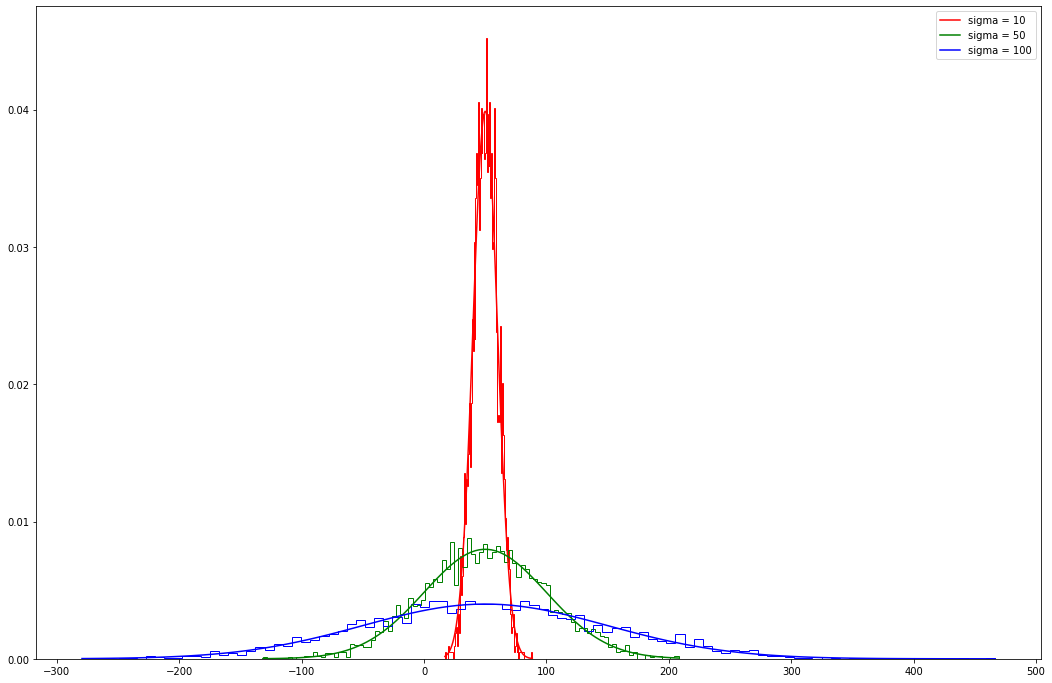

In [55]:
import matplotlib.pyplot as plt

mu = 50
sigma1 = 10
sigma2 = 50
sigma3 = 100

s1 = np.random.normal(mu, sigma1, 3000)
s2 = np.random.normal(mu, sigma2, 3000)
s3 = np.random.normal(mu, sigma3, 3000)


plt.figure(figsize=(18, 12))
count, bins, ignored = plt.hist(s1, 100, density=True, histtype='step', color = 'r')
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma1**2) ), color='r', label = "sigma = 10")

count, bins, ignored = plt.hist(s2, 100, density=True, histtype='step', color = 'g')
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma2**2) ), color='g', label = "sigma = 50")

count, bins, ignored = plt.hist(s3, 100, density=True, histtype='step', color = 'b')
plt.plot(bins, 1/(sigma3 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma3**2) ), color='b', label = "sigma = 100")

plt.legend()

plt.show()

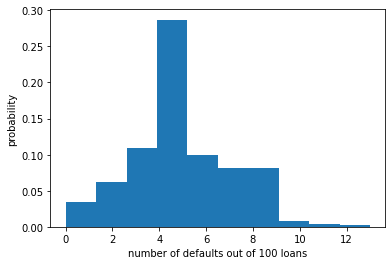

In [49]:
import random

def bernoulli_trials(n, p):
    success = 0

    for i in range(n):
        'Choose random number between zero and one for random_number'
        random_number = random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            success = success + 1

    return success


# Seed random number generator
random.seed(50)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(len(n_defaults)):
    n_defaults[i] = bernoulli_trials(100, 0.05)

plt.figure()
# Plot the histogram with default number of bins; label your axes
plt.hist(n_defaults, density = True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')

# Show the plot
plt.show()

# Some Linear Algebra

# #1
Solve the equations below

$$ 4x  + 8y + z = 2 $$
$$ x + 7y - 3z = -14 $$ 
$$ 2x - 3y +2z = 3 $$
 
You are only allowed to use numpy module of "linalg", but you are not allowed to use "np.linalg.solve".

# #2

Solve the equations below. It's a bit tricky so you will have to think about it a bit.

$$ 1.3x +0.6 y = 3.3 $$
$$ 4.7x + 1.5y = 13.5 $$
$$ 3.1x +5.2y = -0.1 $$

You are only allowed to use numpy module of "linalg", but you are not allowed to use "np.linalg.solve"

In [50]:
import numpy as np
A = np.array([[4, 8, 1], [1, 7, -3], [2, -3, 2]])
B = np.array([2, -14, 3])
X = np.linalg.inv(A).dot(B)
print(X)

[-3.  1.  6.]


In [51]:
import numpy as np
A1 = np.array([[1.3, 0.6], [4.7, 1.5]])
B1 = np.array([3.3, 13.5])
X1 = np.linalg.inv(A1).dot(B1)
print("X1:")
print(X1)


A2 = np.array([[1.3, 0.6], [3.1, 5.2]])
B2 = np.array([3.3, -0.1])
X2 = np.linalg.inv(A2).dot(B2)
print("X2:")
print(X2)

print("Since X1 is not equal to X2, therefore, there is no solution to the equations!")

X1:
[ 3.62068966 -2.34482759]
X2:
[ 3.51428571 -2.11428571]
Since X1 is not equal to X2, therefore, there is no solution to the equations!
